In [1]:
import DSGRN
from HysteresisPaths import *
import csv

Define a network and the input and output signal genes. The input gene is where the parameter factor graph paths are computed and the output gene is where we read the output (which determines if the FP is low or high).

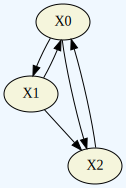

In [2]:
net_spec = 'X0 : X1+X2\n X1 : X0 : E\n X2 : X0+X1 : E'

S_gene = 'X0' # Input signal gene
P_gene = 'X2' # Output sugnal gene

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

Make the parameter graph and get the number of nodes in the parameter graph as well as the number of nodes in the input gene factor graph and the number of reduced parameters (number of nodes in all other factor graphs).

In [3]:
parameter_graph = DSGRN.ParameterGraph(network)

S_index = network.index(S_gene)

# Number of parameter nodes
num_full_params = parameter_graph.size()
# Number of S_gene factor graph parameter nodes
num_factor_params = len(parameter_graph.factorgraph(S_index))
# Number of reduced parameter indices
num_reduce_params = num_full_params // num_factor_params

print('Total number of parameters:', num_full_params)
print('Number of parameters in S_gene factor graph:', num_factor_params)
print('Number of reduced parameters:', num_reduce_params)

Total number of parameters: 160
Number of parameters in S_gene factor graph: 20
Number of reduced parameters: 8


Pick a reduced parameter index (any value between 0 and num_reduce_params-1) and compute all hysteretic paths for this reduced parameter index.

In [4]:
# Pick a reduced parameter index
reduced_par_index = 3

# Compute hysteretic paths
num_paths, hyst_paths = compute_hysteresis_paths(network, S_gene, P_gene, reduced_par_index)

num_hyst_paths = len(hyst_paths)

print('Reduced parameter index:', reduced_par_index)
print('Total number of paths:', num_paths)
print('Number of hysteretic paths:', num_hyst_paths)

Reduced parameter index: 3
Total number of paths: 690
Number of hysteretic paths: 133


Save hysteretic paths to a file.

In [5]:
hyst_paths_fname = 'hysteresis_paths_3_nodes.csv'

with open(hyst_paths_fname, mode='w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    for path in hyst_paths:
        csv_writer.writerow(path)